In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
x = torch.tensor([
    [1., 2., 3., 0., 1., 2.],
    [4., 5., 6., 1., 2., 3.],
    [7., 8., 9., 0., 1., 2.],
    [1., 2., 3., 4., 5., 6.],
    [7., 8., 9., 1., 2., 3.],
    [4., 5., 6., 7., 8., 9.]
]).unsqueeze(0).unsqueeze(0)  # shape (1,1,6,6)

print("Input shape:", x.shape)
print(x)


Input shape: torch.Size([1, 1, 6, 6])
tensor([[[[1., 2., 3., 0., 1., 2.],
          [4., 5., 6., 1., 2., 3.],
          [7., 8., 9., 0., 1., 2.],
          [1., 2., 3., 4., 5., 6.],
          [7., 8., 9., 1., 2., 3.],
          [4., 5., 6., 7., 8., 9.]]]])


PyTorch 在 卷积 / 池化 里默认输入是 4D 张量：

(batch, channels, height, width)
batch = 1
channel=颜色

In [3]:
maxpool1 = nn.MaxPool2d(kernel_size=2, stride=1)
maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

avgpool1 = nn.AvgPool2d(kernel_size=2, stride=1)
avgpool2 = nn.AvgPool2d(kernel_size=2, stride=2)

out_max1 = maxpool1(x)
out_max2 = maxpool2(x)
out_avg1 = avgpool1(x)
out_avg2 = avgpool2(x)

print("MaxPool stride=1:", out_max1.shape)
print("MaxPool stride=2:", out_max2.shape)
print("AvgPool stride=1:", out_avg1.shape)
print("AvgPool stride=2:", out_avg2.shape)


MaxPool stride=1: torch.Size([1, 1, 5, 5])
MaxPool stride=2: torch.Size([1, 1, 3, 3])
AvgPool stride=1: torch.Size([1, 1, 5, 5])
AvgPool stride=2: torch.Size([1, 1, 3, 3])


In [4]:
def show_tensor(tensor, title):
    plt.imshow(tensor.squeeze().detach().numpy(), cmap="viridis")
    plt.colorbar()
    plt.title(title)
    plt.show()


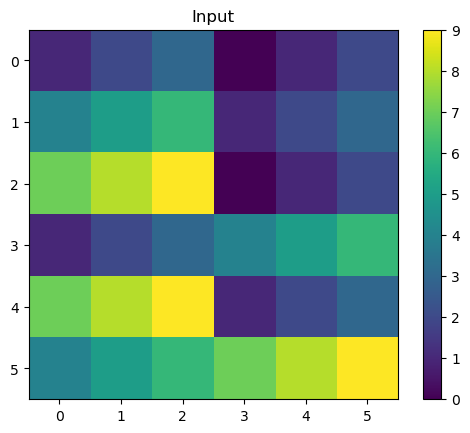

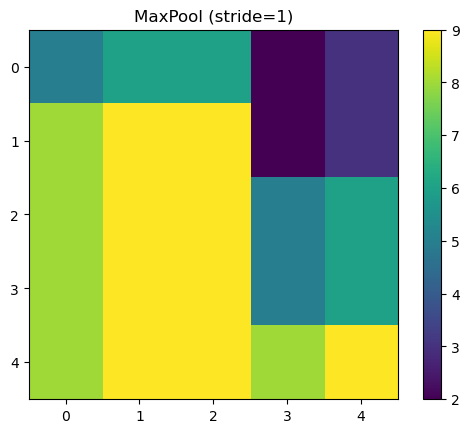

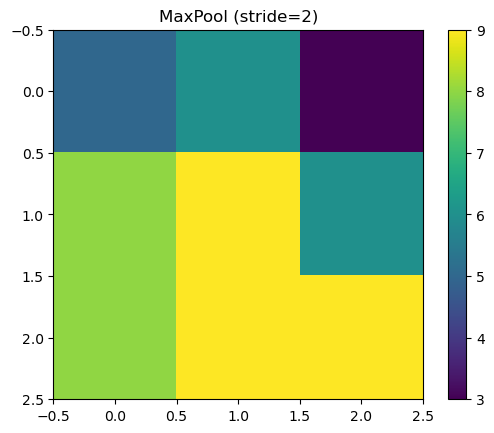

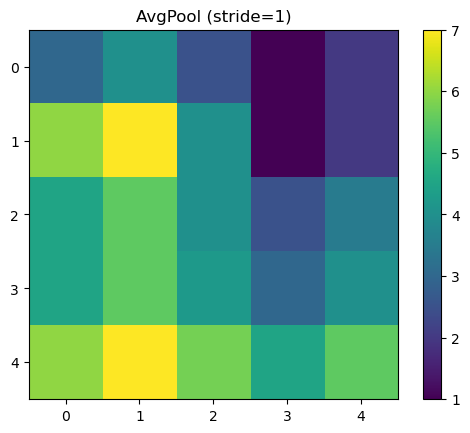

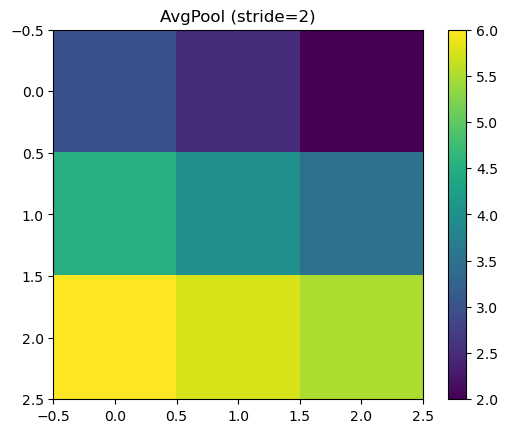

In [5]:
show_tensor(x, "Input")
show_tensor(out_max1, "MaxPool (stride=1)")
show_tensor(out_max2, "MaxPool (stride=2)")
show_tensor(out_avg1, "AvgPool (stride=1)")
show_tensor(out_avg2, "AvgPool (stride=2)")


现在使用一张更复杂的图

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms


In [7]:
# 加载 CIFAR10 数据集中的一张图 (RGB, 32x32)
transform = transforms.ToTensor()
dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

# 取第一张图
img, label = dataset[0]   # img shape: (3, 32, 32)

# 增加 batch 维度 -> (1, 3, 32, 32)
x = img.unsqueeze(0)

print("Input shape:", x.shape)  # [1, 3, 32, 32]


100%|███████████████████████████████████████████████████████████████████████████████| 170M/170M [00:05<00:00, 30.5MB/s]


Input shape: torch.Size([1, 3, 32, 32])


In [8]:
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)

out_max = maxpool(x)
out_avg = avgpool(x)

print("After MaxPool:", out_max.shape)  # [1, 3, 16, 16]
print("After AvgPool:", out_avg.shape)  # [1, 3, 16, 16]


After MaxPool: torch.Size([1, 3, 16, 16])
After AvgPool: torch.Size([1, 3, 16, 16])


In [9]:
def show_image(tensor, title):
    # 转换到 numpy (C,H,W) -> (H,W,C)
    img = tensor.squeeze().permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()


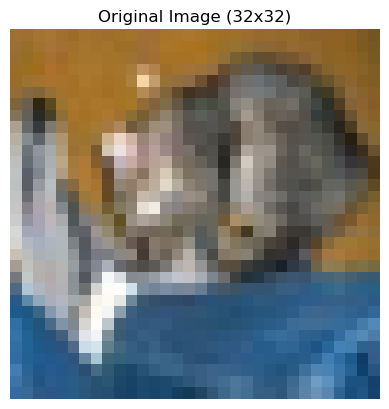

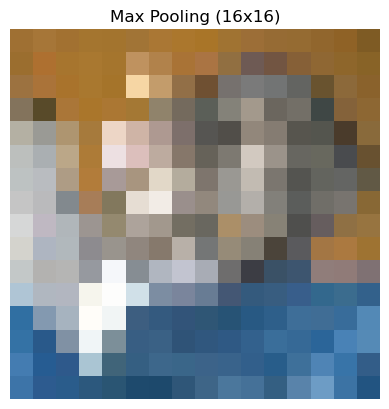

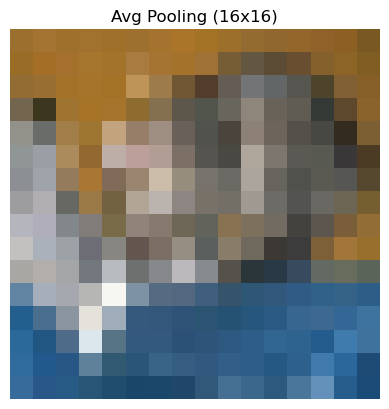

In [10]:
show_image(img, "Original Image (32x32)")
show_image(out_max, "Max Pooling (16x16)")
show_image(out_avg, "Avg Pooling (16x16)")


原始 shape: torch.Size([3, 32, 32])


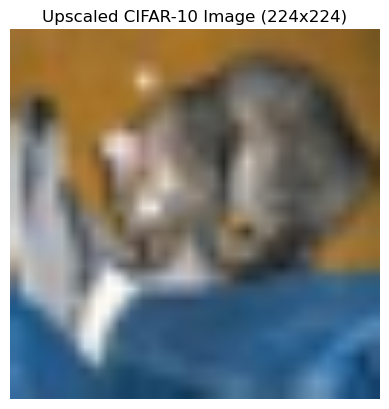

In [11]:
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

# 下载 CIFAR-10 测试集 (如果已有会直接复用)
transform = transforms.ToTensor()
dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

# 取第一张图 (原图大小 32x32)
img, label = dataset[0]
print("原始 shape:", img.shape)  # torch.Size([3, 32, 32])

# 把图像放大到 224x224
big_img = F.resize(img, [224, 224])

# 转换成 [H, W, C] 格式给 matplotlib
img_np = big_img.permute(1, 2, 0).numpy()

# 显示
plt.imshow(img_np)
plt.title("Upscaled CIFAR-10 Image (224x224)")
plt.axis("off")
plt.show()


STL-10 图片可视化 + Pooling

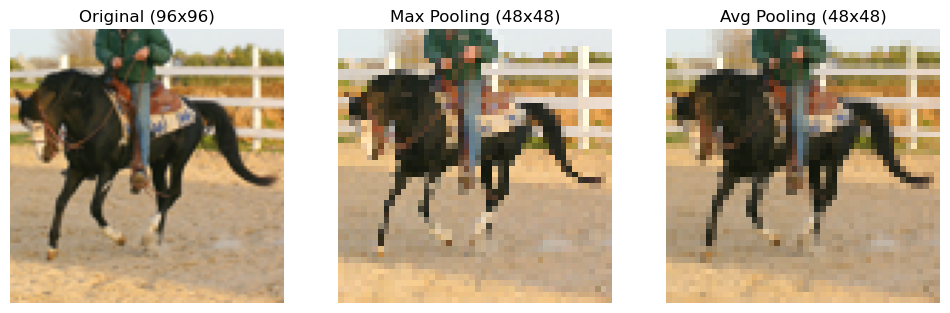

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# 1. 定义变换：转 tensor
transform = transforms.ToTensor()

# 2. 加载 STL-10，但只取一张（不会占用整个数据集内存）
dataset = datasets.STL10(root="./data", split="test", download=True, transform=transform)
img, label = dataset[0]   # 只取第一张

# 3. 增加 batch 维度
x = img.unsqueeze(0)   # [1, 3, 96, 96]

# 4. 定义池化
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)

out_max = maxpool(x)
out_avg = avgpool(x)

# 5. 可视化对比
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(img.permute(1, 2, 0).numpy())
axes[0].set_title("Original (96x96)")
axes[0].axis("off")

axes[1].imshow(out_max.squeeze().permute(1, 2, 0).detach().numpy())
axes[1].set_title("Max Pooling (48x48)")
axes[1].axis("off")

axes[2].imshow(out_avg.squeeze().permute(1, 2, 0).detach().numpy())
axes[2].set_title("Avg Pooling (48x48)")
axes[2].axis("off")

plt.show()
